In [1]:
# Importação das bibliotecas necessárias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2025-06-17 00:10:43.872048: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-17 00:10:44.142129: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-17 00:10:44.258761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750119044.540200    8571 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750119044.630371    8571 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750119045.469136    8571 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
## carregamento
df=pd.read_csv('../data/diabetes_dataset.csv')

In [ ]:
df_teste = df.sample(frac=0.05)

In [ ]:
## Limpeza
df.drop('year',axis=1,inplace=True)
df=pd.get_dummies(df,columns=['gender'],drop_first=True)
df['gender_Male']=df['gender_Male'].astype(int)
df['gender_Other']=df['gender_Other'].astype(int)
#df['smoking_history'].unique()

KeyError: "['year'] not found in axis"

In [8]:
X=df[['age','hypertension','hbA1c_level','bmi','heart_disease','blood_glucose_level']]
y=df['diabetes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [9]:
df.head()

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,0,0
1,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,0,0
2,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,1,0
3,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,1,0
4,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,0,0


In [13]:
X_train

array([[-1.10240956, -0.28463011,  0.25426637, -0.78037629, -0.20389622,
        -1.30070428],
       [ 0.49531684, -0.28463011, -1.42695711,  0.16329767, -0.20389622,
         0.05119666],
       [-0.83612183, -0.28463011,  1.00147681, -1.55698835, -0.20389622,
         0.41989692],
       ...,
       [-1.72374761, -0.28463011,  1.00147681, -1.90766783, -0.20389622,
         0.05119666],
       [-0.17040249, -0.28463011,  3.24310813,  1.53139915, -0.20389622,
         3.9839994 ],
       [-1.27993472, -0.28463011, -1.42695711, -0.42668669, -0.20389622,
         0.51821699]])

In [12]:
## Scalling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [14]:
## Training
model = Sequential()
model.add(Dense(units=64, activation="relu")) #Escondida
model.add(Dense(units=32, activation="relu")) #Escondida
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="SGD")

2025-06-17 00:40:30.094447: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience = 20)

In [21]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
 105/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - loss: 0.0911

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0846 - val_loss: 0.0846
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0821 - val_loss: 0.0850
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0809 - val_loss: 0.0864
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0819 - val_loss: 0.0852
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0819 - val_loss: 0.0850
Epoch 6/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0822 - val_loss: 0.0844
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0794 - val_loss: 0.0846
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0816 - val_loss: 0.0844
Epoch 9/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0815 - val_loss: 0.0844
Epoch 10/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0803 - val_loss: 0.0842
Epoch 11/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0802 - val_loss: 0.0841
Epoch 12/100
2188/2188 ━━━━━━━━

<Axes: >

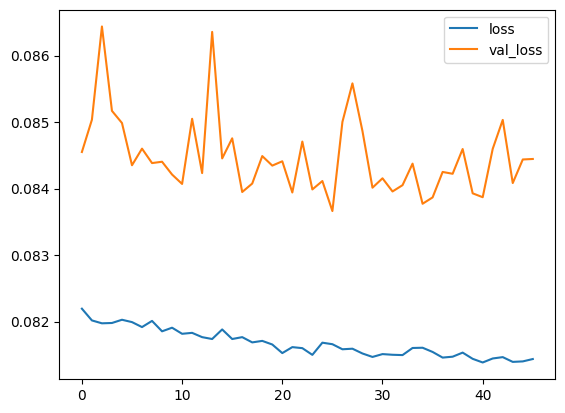

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
preds = (model.predict(X_test)).astype("int32")

482/938 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step


In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27422
           1       1.00      0.41      0.58      2578

    accuracy                           0.95     30000
   macro avg       0.97      0.71      0.78     30000
weighted avg       0.95      0.95      0.94     30000



Exemplo de registro:
*  age : 40
*  hypertension : 1
*  hbA1c_leve : 6.5
*  bmi : 28.9
*  heart_disease : 0
*  blood_glucose_level : 166

In [31]:
## Predicting

prediction=(model.predict(scale.transform(np.array([[40,1,6.5,28.9,0,166]])))).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
